# REGRESSION 101 : Prédire le prix de vente des maisons

![House Prices - Advanced Regression Techniques](pictures/KagglePicture.png)
[source](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

![PyCaret](pictures/Pycaret.png)

[source](https://medium.com/analytics-vidhya/pycaret-prepare-your-machine-learning-model-in-minutes-db7525d8615l)

# Etape 1 : Introduction et préparation de l'environnement

## Introduction
### Objectif(s) Business

Prédire le prix de vente d'un bien immobilier sur la ville de Ames (Iowa, USA)

### Objectif(s) Technique(s)
* Construire dans son intégralité un modèle de régression à l'aide de Pycaret

### Prérequis
* Connaissances de bases de Pandas
* Un bon niveau de compréhension en Machine Learning

### PyCaret
> Pycaret est une librairie Python, low-code et open-source, qui permet l'automatisation du workflow de machine learning.
"PyCaret is an open source, low-code machine learning library in Python that automates machine learning workflow" 
(Moez Ali, founder & Author of PyCaret)


### Sources
* [PyCaret Official documentation](https://pycaret.readthedocs.io/en/latest)
* [Données Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

## Import des librairies

Pour installer Pycaret voici quelques conseils dans les étapes à réaliser 

__Créer un environement conda :__
*conda create --name yourenvname python=3.8* -> Attention PyCaret n'est actuellement pas compatibles aux versions Python > 3.8


__Activer l'environemetn conda :__
*conda activate yourenvname*

__Installer PyCaret :__
*pip install pycaret[full]* -> Sans [full] vous n'aurez pas accès à l'intégralité des modèles

Vous devriez avoir accès aux librairies nécessaires pour ce projet, à savoir :
pandas==1.3.5
pandas-profiling==3.1.0
scikit-learn==0.23.2
shap==0.40.0

In [1]:
# Import de Pandas pour la manipulation des données
import pandas as pd

# Nous importons ProfileReport de la librairie pandas_profiling pour réaliser une analyse exploratoire rapide
from pandas_profiling import ProfileReport

# Nous importons le module Regression de la librairie PyCaret afin de travailler notre modèle de Machine Learning
from pycaret.regression import *

In [2]:
# Permet d'afficher les graphiques dans le notebook
%matplotlib inline

In [3]:
# Configuration de la taille d'affichage des graphiques

from IPython.core.pylabtools import figsize
figsize(10, 6)

In [4]:
# Impression de la version de Pycaret

print('PyCaret: %s' % pycaret.__version__)

PyCaret: 2.3.6


# Etape 2 : Import et préparation des données

In [5]:
# Commençons par charger les données en dataframe à l'aide de la fonction pandas read_csv

data = pd.read_csv('data/train.csv')

In [6]:
# Observons la forme de notre dataframe

data.shape

(1460, 81)

In [7]:
# Listons les différentes variables et leur nature

data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


Nous pouvons également nous appuyer sur le document de description fourni dans le dataset (ce qui n'est pas toujours le cas)

In [8]:
f = open('data/data_description.txt', 'r')
data_description = f.read()
f.close

<function TextIOWrapper.close()>

In [9]:
print(data_description)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

Voici la traduction proposée pour les variables du dataframe :

- **MSSubClass:** Identification du type de logement concerné par la vente.	
- **MSZoning:** Identification de la zone géographique concernée par la vente	
- **LotFrontage:** Distance linéaire (en pieds) connectant la propriété à la rue
- **LotArea:** Taille du bien (en pieds carrés)
- **Street:** Type de route pour accéder à la propriété       	
- **Alley:** Type d’allée pour accéder à la propriété		
- **LotShape:** Forme générale de la propriété      
- **LandContour:** Platitude la propriété		
- **Utilities:** Type de services disponibles
- **LotConfig:** Configuration du bien	
- **LandSlope:** Pente de la propriété	
- **Neighborhood:** Quartier de la ville
- **Condition1:** Proximité de certaines commodités	
- **Condition2:** Proximité de certaines commodités (si plus d’une présente)
- **BldgType:** Type de logement	
- **HouseStyle:** Style du logement (et nombre d’étages de la propriété)
- **OverallQual:** Note globale des matériaux et de la finition du bien
- **OverallCond:** Note globale des commodités de la maison 
- **YearBuilt:** Date de construction
- **YearRemodAdd:** Date de rénovation (égale à celle de construction si pas de rénovation)
- **RoofStyle:** Type de toit		
- **RoofMatl:** Matière du toit
- **Exterior1st:** Type de murs extérieurs	
- **Exterior2nd:** Type des murs extérieurs (si plus d’un type)	
- **MasVnrType:** Type de placage de maçonnerie (façade)
- **MasVnrArea:** Placage de maçonnerie en pieds carrés 
- **ExterQual:** Evaluation de la qualité des matériaux extérieurs		
- **ExterCond:** Evaluation de l’état des matériaux extérieurs
- **Foundation:** Type de fondation		
- **BsmtQual:** Evaluation de la hauteur du sous-sol
- **BsmtCond:** Evaluation de l’état général du sous-sol
- **BsmtExposure:** Exposition des vis-à-vis depuis la rue	
- **BsmtFinType1:** Appréciation de la surface utile du sous-sol par rapport à la zone 	
- **BsmtFinSF1:** Type 1 de surface utile en pieds carrés
- **BsmtFinType2:** Appréciation de la surface utile du sous-sol par rapport à la zone (si plusieurs types)
- **BsmtFinSF2:** Type 2 de surface utile en pieds carrés
- **BsmtUnfSF:** Appréciation de la surface non utile du sous-sol par rapport à la zone
- **TotalBsmtSF:** Taille totale du sous-sol en pieds carrés
- **Heating:** Type de chauffage		
- **HeatingQC:** Qualité du chauffage		
- **CentralAir:** Présence de climatisation		
- **Electrical:** Système électrique		
- **1stFlrSF:** Taille du rez-de-chaussée en pieds carrés
- **2ndFlrSF:** Taille du premier étage en pieds carrés
- **LowQualFinSF:** Surface utile en pieds carrés (tous les étages)
- **GrLivArea:** Surface hors sous-sol en pieds carrés
- **BsmtFullBath:** Salles de bains en sous-sol
- **BsmtHalfBath:** Toilettes en sous-sol
- **FullBath:** Salles de bains hors sous-sol
- **HalfBath:** Toilettes hors sous-sol
- **Bedroom:** Chambres hors sous-sol
- **Kitchen:** Cuisine hors sous-sol
- **KitchenQual:** Etat de la cuisine       	
- **TotRmsAbvGrd:** Nombre de pièces hors sous-sol (n’inclus pas les salles de bains)
- **Functional:** Fonctionnalité de la maison		
- **Fireplaces:** Nombre de cheminées
- **FireplaceQu:** Etat de la cheminée		
- **GarageType:** Localisation du garage		
- **GarageYrBlt:** Année de construction du garage
- **GarageFinish:** Finition du garage		
- **GarageCars:** Taille du garage en capacité de véhicules
- **GarageArea:** Taille du garage en pieds carrés
- **GarageQual:** Qualité du garage	
- **GarageCond:** Etat du Garage
- **PavedDrive:** Allée de garage pavée (oui/non/partiellement)
- **WoodDeckSF:** Terrasse en bois en pieds carrés 
- **OpenPorchSF:** Porche ouvert en pieds carrés
- **EnclosedPorch:** Porche fermé en pieds carrés
- **3SsnPorch:** Porche trois saisons en pieds carrés
- **ScreenPorch:** Véranda en pieds carrés
- **PoolArea:** Piscine en pieds carrés
- **PoolQC:** Etat de la piscine		
- **Fence:** Etat de la clôture	
- **MiscFeature:** Commodités supplémentaires non reprises dans les autres catégories		
- **MiscVal:** Valeurs de commodités supplémentaires en dollars
- **MoSold:** Mois de la vente (MM)
- **YrSold:** Année de la vente (YYYY)
- **SaleType:** Type de vente		
- **SaleCondition:** Condition de vente


# Etape 3 : Exploration des données (EDA)

Avant d'utiliser la librairie de pandas-profiling nous pouvons observer les données de façon plus classique :

In [10]:
# Nous pouvons observer les premiers individus de notre dataset avec la commande head()

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# Nous pouvons également observer la distribution des variables de notre dataset avec la commande describe()

data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Faisons appel à ProfileReport de la libraire pandas-profiling pour générer un rapport html avec un grand nombre d'informations.

_Il convient d'enlever les # pour exécuter le code_

In [12]:
# ProfileReport(data)

In [13]:
# Seconde exécution pour exporter le rapport au format html

# profile = ProfileReport(data)
# profile.to_file("ProfileReportExport.html")

Egalement,je trouve qu'il est toujours important de jeter un oeil sur notre variable cible avant d'avancer davantage sur tout projet.

In [14]:
# Observons la distribution de notre target

data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

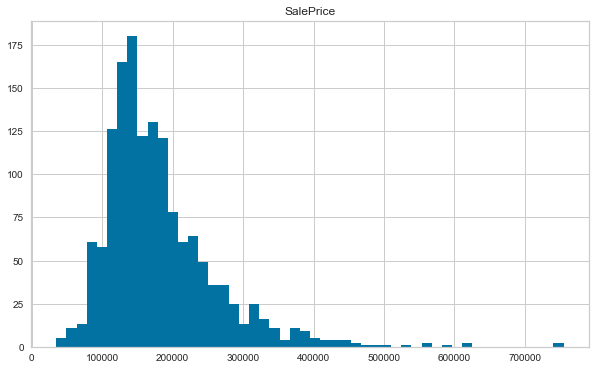

In [15]:
# Générons un rapide graphique qui nous permettra d'observer l'éventuelle existence d'outliers.

data.hist(column='SalePrice',figsize=(10,6),bins=50)

Il semble y avoir quelques outliers que l'on pourrait éventuellement qualifier de biens d'exception. Il pourra être intéressant de se demander si les supprimer ne permettra pas de mieux généraliser notre modèle.

# Etape 4 : Preprocess des données

In [16]:
mySetup = setup(data=data, target='SalePrice')

,Description,Value
0,session_id,6129
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,19
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 402)"


In [17]:
mySetup = setup(data=data, 
                target='SalePrice', 
                session_id=42, 
                fold=5,
                ignore_features=['Id'],
                normalize=True)

,Description,Value
0,session_id,42
1,Target,SalePrice
2,Original Data,"(1460, 81)"
3,Missing Values,True
4,Numeric Features,18
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 403)"


# Etape 5 : Construire un modèle de régression

In [18]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


Créons notre premier modèle à l'aide de la fonction create_model

Nous allons entrainer une "simple" régression linéaire avec l'argument 'lr' et cela nous retournera un tableau de scores issu d'une cross validation sur la base de métriques d'évaluations classiques en termes de régression.

In [19]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,52445.0244,71653744812.1171,267682.1713,-9.4724,0.4271,0.5222
1,10266955.6029,1724230824176842.0000,41523858.4934,-269250.6004,2.0551,100.8859
2,1472053.7255,41969049184584.7266,6478352.3511,-6571.2856,1.3703,14.0185
3,3213168.3873,195060739523586.1562,13966414.6983,-36655.4047,1.5321,22.1991
4,2141333.0147,67830135765818.0625,8235905.2791,-13332.8118,1.4197,12.9392
Mean,3429191.1510,405832480479128.6250,14094442.5986,-65163.9150,1.3609,30.1130
SD,3569119.4550,662402136111826.7500,14393719.7525,102789.8548,0.5266,36.0584


En matière de régression il est courant d'évaluer un modèle selon son coefficient de détermination (R2).

Dans notre cas il est négatif, et il est possible que notre modèle soit en overfitting (peut être trop de données pour une régression linéaires).

Observons la Régression Lasso pour voir les résultats obtenus.

In [20]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19619.7305,882986667.8998,29715.0916,0.8709,0.1689,0.1144
1,24923.5691,4432256687.7849,66575.1957,0.3079,0.2528,0.1582
2,18236.5444,1435981537.5152,37894.3470,0.7751,0.2279,0.1101
3,17685.7221,624491806.6730,24989.8341,0.8826,0.2190,0.1063
4,21585.0980,1619355793.6932,40241.2201,0.6817,0.2234,0.1226
Mean,20410.1328,1799014498.7132,39883.1377,0.7037,0.2184,0.1223
SD,2627.6714,1365038105.5820,14434.3280,0.2108,0.0274,0.0187


Le R2 est plus facile à analyser avec un résultat de 0.70

In [21]:
# Nous pouvons afficher les hyperparamètres de notre modèle

print(lasso)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)


In [22]:
# Comparons les différents modèles sur la base du R2

compare_models(fold=5,
              sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,16116.0319,924064745.9382,29785.6774,0.8489,0.1311,0.0910,6.7440
lightgbm,Light Gradient Boosting Machine,17672.0624,1030784498.4481,31503.9185,0.8322,0.1481,0.1021,0.3420
par,Passive Aggressive Regressor,16622.9821,1085458340.1950,30518.2209,0.8261,0.1370,0.0973,0.7400
huber,Huber Regressor,16189.2554,1101577016.3843,30165.7166,0.8236,0.1373,0.0953,0.7140
rf,Random Forest Regressor,18910.5993,1098733341.6663,32495.7308,0.8199,0.1566,0.1115,1.2640
gbr,Gradient Boosting Regressor,18324.8533,1222049095.1114,33258.5193,0.8022,0.1485,0.1058,0.5160
llar,Lasso Least Angle Regression,18019.7944,1404734585.0620,34536.6577,0.7747,0.1726,0.1069,1.9120
br,Bayesian Ridge,18609.7438,1438463732.8684,34962.1522,0.7684,0.1574,0.1103,0.4800
knn,K Neighbors Regressor,22465.9790,1482571883.1586,38120.6847,0.7567,0.1761,0.1246,0.1500
en,Elastic Net,20651.5845,1511282018.4903,37227.6634,0.7554,0.1611,0.1180,0.0520


Pour accélérer l'exécution de la fonction, il est possible d'utiliser le paramètre budget_time pour déterminer une durée à laquelle la fonction doit nous fournir le résultat.

Il est également possible d'inclure ou d'exclure certains modèles de l'évaluation ce qui automatiquement va permettre de gagner du temps pour l'exécution.

Nous constatons que c'est le modèle "CatBoost Regressor" qui obtient le meilleur résultat R2 (0.84).

*On peut noter que la RMSE (Root-Mean-Squared-Error) une autre métrique d'évaluation est également meilleure avec CatBoost cela signifie qu'en prenant le logarithme des erreurs, les prédictions des maisons les plus chères et les moins chères affectent le résultat de façon égalitaire. Ici nous avons simplement chercher à créer un modèle rapide sans se focaliser sur la métrique d'évaluation.* 

*Si cela vous intéresse un atelier est dédié à l'appréciation des métriques*

In [23]:
bestModelnoout = automl(optimize='R2')
tuned_bestModelnoout = tune_model(bestModelnoout,
                            optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,20197.2777,1566351326.4137,39577.1566,0.7711,0.1484,0.1073
1,22625.6253,2581404610.1488,50807.5251,0.5969,0.1913,0.1342
2,17761.7957,822615962.7855,28681.2824,0.8712,0.1438,0.1029
3,18725.5343,901185746.8421,30019.7559,0.8306,0.1337,0.1017
4,18141.7534,719944441.6716,26831.7804,0.8585,0.1351,0.0993
Mean,19490.3973,1318300417.5723,35183.5001,0.7857,0.1505,0.1091
SD,1773.2035,697807861.2101,8967.8167,0.1005,0.0211,0.0128


In [24]:
print(bestModelnoout)

In [25]:
tuned_bestModelnoout = tune_model(bestModelnoout,
                            optimize='R2', n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17408.4313,893100086.1172,29884.7802,0.8695,0.1344,0.0979
1,20683.4885,1454569021.4756,38138.8125,0.7729,0.1766,0.1212
2,17850.3045,1144505176.2177,33830.5362,0.8208,0.1660,0.1091
3,17220.7987,796911007.9584,28229.6123,0.8502,0.1361,0.0965
4,16107.4028,730958869.8670,27036.2510,0.8563,0.1258,0.0894
Mean,17854.0851,1004008832.3272,31423.9984,0.8339,0.1478,0.1028
SD,1526.8331,265514687.9311,4067.0819,0.0344,0.0198,0.0112


# Etape optionnelle : Gestion des outliers et des features selection

Nous avons pu observer rapidement précédemment qu'il semble exister des outliers qui pourraient avoir tendance à limiter la généralisation de notre modèle.

Il sera judicieux de voir si notre modèle ne peut pas être plus performant en cherchant à les supprimer. Nous avons également aborder la possibilité que notre regression linéaire pouvait être heurtée à un problème d'overfitting et donc la possibilité d'être confrontée à trop de variables.
Intégrer un paramètre de sélection des variables pourrait donc également s'avérer payant.

Nous pourrions éventuellement aborder le sujet de la sorte, mais cela nécessite davantage de connaissances en matière de machine learning.

mySetup = setup(

    -data=data, 
    -target='SalePrice', 
    -session_id=42, 
    -fold=5,
    -ignore_features=['Id'],
    -feature_selection = True,
    -remove_outliers = True,
    - normalize=True
    
    )
    
Une méthode plus simple peut être de réduire notre dataframe aux données hors outliers.

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

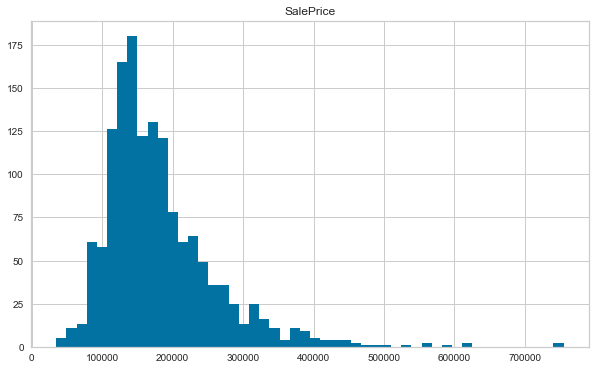

In [26]:
# Reprenons notre graphique précédent

data.hist(column='SalePrice',figsize=(10,6),bins=50)

Nous constatons donc quelques individus qui ne semblent pas être très représentatifs de la population. A partir de 450 000 voir 400 000 $, nous pouvons constater que la courbe s'applatit grandement.

Nous pouvons donc cantoner notre dataframe aux individus dont le prix est inférieur à ce motant.

_Il existe bien sûr des méthodes plus mathématiques pour gérer les problèmes d'outliers mais nous sommes ici dans l'optique d'une modélisation rapide d'un modèle de machine learning_

In [27]:
# Gestion des outliers manuelle
data_no_out = data[data['SalePrice'] <= 450000]

array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

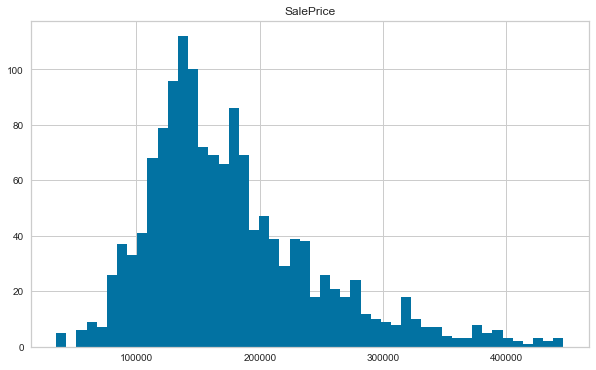

In [28]:
# Générons un rapide graphique qui nous permettra d'observer l'éventuelle existence d'outliers.

data_no_out.hist(column='SalePrice',figsize=(10,6),bins=50)

In [29]:
# Reprenons donc notre setup précédent sans le modifier et ainsi simplement constater la différence engendrée par la suppression manuelle

mySetup = setup(data=data_no_out, 
                target='SalePrice', 
                session_id=42, 
                fold=5,
                ignore_features=['Id'],
                normalize=True)

,Description,Value
0,session_id,42
1,Target,SalePrice
2,Original Data,"(1446, 81)"
3,Missing Values,True
4,Numeric Features,18
5,Categorical Features,61
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1012, 410)"


In [30]:
# Comparons les modèles sur la base du R2

compare_models(fold=5,
              sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,15095.3840,536875330.1789,23030.5185,0.8973,0.1265,0.0901,4.8840
gbr,Gradient Boosting Regressor,16696.0600,605071880.1156,24481.7999,0.8846,0.1392,0.1015,0.3360
lightgbm,Light Gradient Boosting Machine,17479.0209,686428052.9105,26117.2882,0.8674,0.1478,0.1058,0.2360
rf,Random Forest Regressor,18471.7181,787867692.7428,27923.9022,0.8493,0.1575,0.1130,0.7320
xgboost,Extreme Gradient Boosting,19097.6829,812469890.6186,28373.4209,0.8443,0.1586,0.1149,0.7720
par,Passive Aggressive Regressor,15551.4425,875596496.9179,28134.7352,0.8319,0.1377,0.0945,0.4220
br,Bayesian Ridge,17273.4986,881038464.4159,29083.4626,0.8297,0.1562,0.1070,0.1780
huber,Huber Regressor,15744.9575,894360780.4806,28465.2604,0.8268,0.1567,0.0982,0.3960
ada,AdaBoost Regressor,22002.5489,934054706.2304,30465.0765,0.8213,0.1845,0.1430,0.3280
knn,K Neighbors Regressor,20635.9405,953945780.2269,30617.8907,0.8175,0.1699,0.1215,0.0720


Nous constatons que c'est toujours le modèle "CatBoost Regressor" qui obtient le meilleur résultat R2 mais qui désormais monte à 0.89 !!

Afin de sélectionner automatiquement le meilleur modèle, nous pouvons faire appel à la fonction automl. Nous passerons donc ici la valeur "R2" en paramètre d'optimisation.

In [31]:
bestModel = automl(optimize='R2')

In [32]:
print(bestModel.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 1000, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'rsm': 1, 'boost_from_average': True, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'random_seed': 42, 'depth': 6, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'RMSE', 'learning_rate': 0.041019998490810394, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterat

## Hyperparamètrage de notre modèle

Nous pouvons hyperparamètrer notre modèle à l'aide de la fonction tune_model.

Nous pouvons ainsi nous appuyer sur la fonction tune_model qui prend en input une instance du modèle. Une recherche aléatoire des hyperparamètres du modèle est ensuite effectuée (où nous pouvons contrôler le nombre d’évaluations via l’argument « n_iter »).

Changeons éventuellement le paramètre d’optimisation pour R2

In [33]:
tuned_bestModel = tune_model(bestModel,
                            optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17416.5623,609475394.6330,24687.5555,0.8697,0.1420,0.1068
1,16944.8169,520858991.3898,22822.3354,0.8905,0.1443,0.1097
2,17416.9880,760684132.0977,27580.5028,0.8432,0.1373,0.1001
3,18179.1317,698175612.1615,26423.0129,0.8797,0.1449,0.1070
4,17654.2382,768975857.4439,27730.4139,0.8712,0.1518,0.1062
Mean,17522.3474,671633997.5452,25848.7641,0.8709,0.1441,0.1059
SD,401.1467,94558570.0568,1864.2405,0.0157,0.0047,0.0032


In [34]:
print(tuned_bestModel.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 130, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 4, 'random_strength': 0, 'rsm': 1, 'boost_from_average': True, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.800000011920929, 'use_best_model': False, 'random_seed': 42, 'depth': 2, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 1, 'loss_function': 'RMSE', 'learning_rate': 0.5, 'score_function': 'Cosine', 'task_type': 'CPU', 'leaf_estimation_iterations': 1, 'bootstr

# Etape 6 : Evaluer un modèle

Faisons appel à la fonction plot_model qui prend à minima le modèle en paramètre.

Nous pouvons également sélectionner le type de graphiques que nous souhaitons. Par défaut, pour un modèle de régression, le graphique est celui des résidus (Residuals).

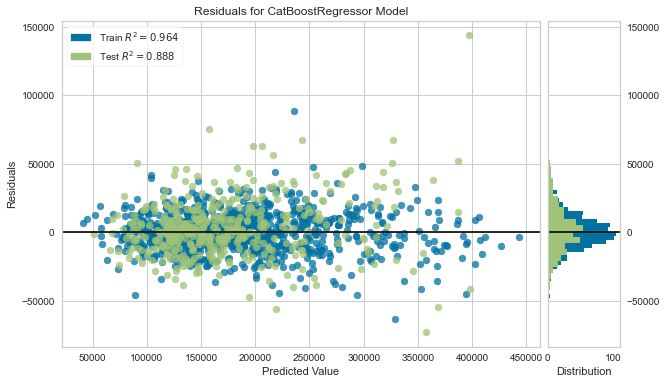

In [35]:
plot_model(tuned_bestModel)

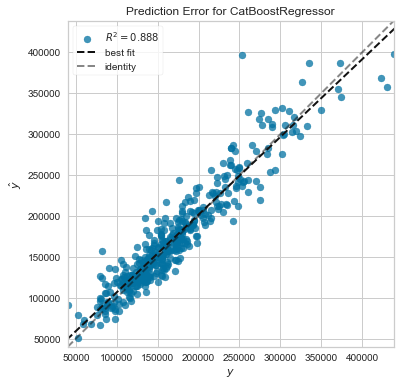

In [36]:
plot_model(tuned_bestModel, plot='error')

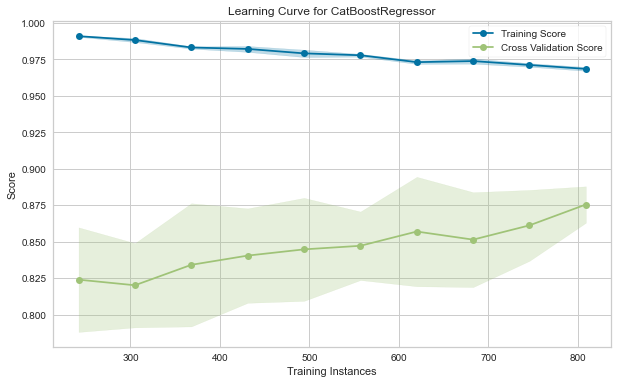

In [37]:
plot_model(tuned_bestModel, plot='learning')

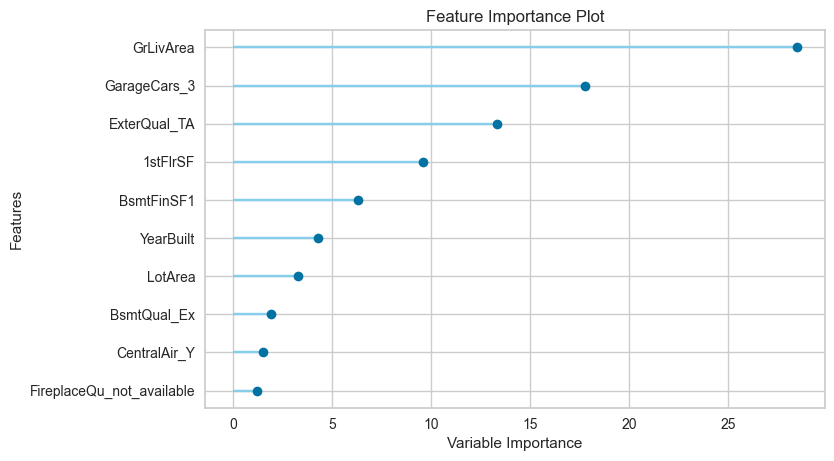

In [38]:
plot_model(tuned_bestModel, plot='feature')

# Etape 7 : Interprétation et Explication du modèle

In [39]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,14748.0538,553324277.1798,23522.8459,0.8817,0.1235,0.0880
1,13458.7170,332736790.2869,18241.0743,0.9300,0.1191,0.0872
2,14380.5638,541750603.4919,23275.5366,0.8883,0.1121,0.0800
3,16564.6121,661932857.4970,25728.0558,0.8860,0.1371,0.0975
4,16324.9735,594632122.4391,24385.0799,0.9004,0.1404,0.0977
Mean,15095.3840,536875330.1789,23030.5185,0.8973,0.1265,0.0901
SD,1181.5927,110401188.2252,2543.7272,0.0175,0.0107,0.0067


## Interprétations globales

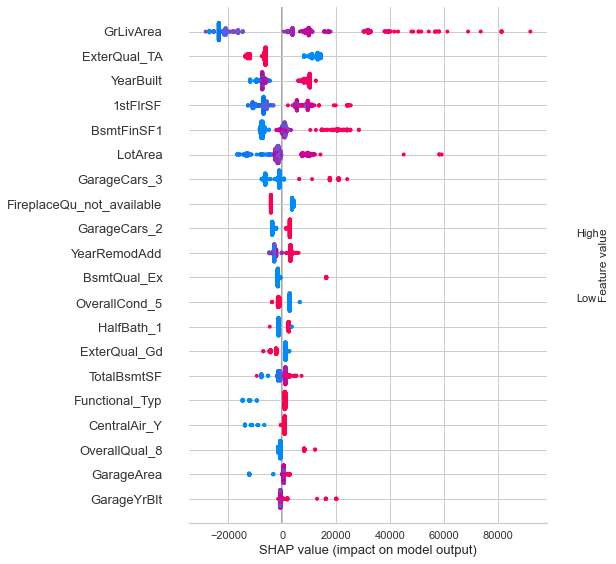

In [40]:
interpret_model(tuned_bestModel)

## Interprétations locales

Enfin nous allons voir comment expliquer notre modèle prédit le cas d’un individu test et comment cela diffère de notre basline.

Le but de SHAP est ici d’expliquer la prédiction d’un échantillon x en calculant la contribution de chacune des variables pour sa prédiction.


In [41]:
interpret_model(tuned_bestModel, 
                plot='reason',
                observation=42)

# Etape 8 : Déploiement du modèle

In [42]:
final_model = finalize_model(tuned_bestModel)

In [43]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,10842.7270,205912114.8113,14349.6381,0.9490,0.0961,0.0710


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SalePrice,Label
0,0.118840,-0.164510,1.178407,1.061432,-0.597181,-0.919981,-0.282364,1.710597,0.644745,0.470530,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181134,191556.296329
1,0.888291,-0.062809,0.710885,0.380007,0.873239,1.183949,-0.282364,-0.468710,0.660588,0.555043,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,260000,314782.101578
2,-0.469564,0.053014,-1.726907,-1.712942,-0.597181,0.419281,-0.282364,-1.289369,-0.946299,-0.699450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,108000,113555.057798
3,0.254625,-0.094203,1.078224,0.964086,1.378695,-0.972415,-0.282364,1.316225,0.198891,-0.049754,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,317000,303135.871208
4,-0.786397,-0.657672,1.145012,1.012759,-0.338709,1.365284,-0.282364,-0.637401,0.680957,0.893096,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,246578,222137.806373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,-1.646372,-0.656148,0.877857,0.672046,-0.597181,-0.391267,-0.282364,1.307106,0.791855,0.462607,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,181000,166242.179351
430,-0.016946,-0.262858,-0.391130,-1.226210,-0.597181,-0.155313,3.099240,-0.461871,0.484057,0.283016,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,155000,153749.250042
431,0.661982,-0.032329,0.543913,0.185314,0.660717,0.738257,-0.282364,0.256206,0.918595,0.916865,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,175000,183507.121888
432,-0.469564,-0.440758,-1.526540,-1.712942,-0.597181,-0.972415,-0.282364,0.899056,-0.215279,-0.464397,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,102000,97181.100122


In [44]:
# Commençons par charger les données en dataframe à l'aide de la fonction pandas read_csv

data_test = pd.read_csv('data/test.csv')

In [45]:
data_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [46]:
pred_test = predict_model(final_model, data = data_test)

In [47]:
pred_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,128019.508550
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,161156.587887
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,203324.826604
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,200238.990607
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,178493.700854


In [48]:
## Sauvegarde du modèle final 

save_model(final_model, 'FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Id'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[], target='SalePrice',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('rem_outliers', 'passthrough'), ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='SalePrice')),
                 ('fix_perfect', Remove_100(target='SalePrice')),
                 ('clean_names', Clean_Colum_Names()),
              

In [49]:
cols = list(pred_test.columns)
cols = [cols[-1]] + cols[:-1]
pred_test = pred_test[cols]

In [50]:
pred_test.head()

,Label,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,128019.508550,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,161156.587887,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,203324.826604,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,200238.990607,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,178493.700854,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


*Hadrien HUBERT* **Uluumy**